In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [2]:
stocks = ["AAPL"]
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2024,8,17)
data = yf.download(stocks, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df = data

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.253262,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.874275,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.966295,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.844955,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.951632,258529600


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300
2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600
2024-08-15,224.600006,225.350006,222.759995,224.720001,224.720001,46414000
2024-08-16,223.919998,226.830002,223.649994,226.050003,226.050003,44340200


In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.253262,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.874275,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.966295,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.844955,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.951632,258529600
...,...,...,...,...,...,...
2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300
2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600


In [7]:
df = df.reset_index()

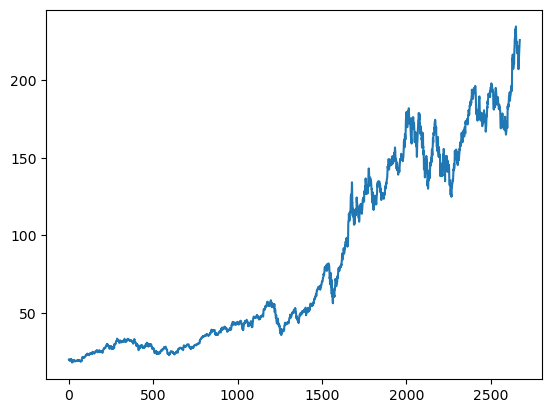

In [8]:
plt.plot(df.Close)

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.253262,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.874275,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,16.966295,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.844955,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,16.951632,258529600
...,...,...,...,...,...,...,...
2669,2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100
2670,2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300
2671,2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600
2672,2024-08-15,224.600006,225.350006,222.759995,224.720001,224.720001,46414000


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2669    196.0905
2670    196.5165
2671    197.0200
2672    197.5444
2673    198.0964
Name: Close, Length: 2674, dtype: float64

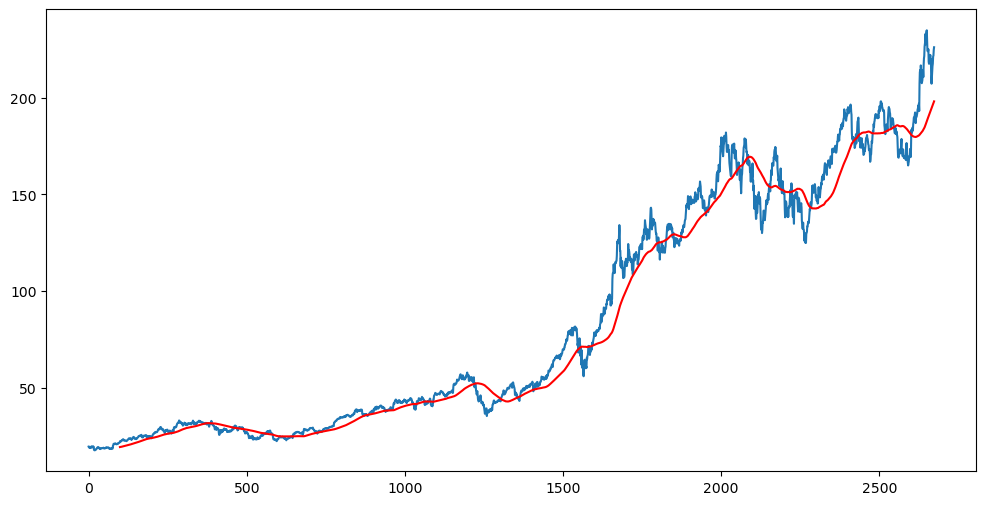

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2669    190.64970
2670    190.90055
2671    191.17470
2672    191.45720
2673    191.73600
Name: Close, Length: 2674, dtype: float64

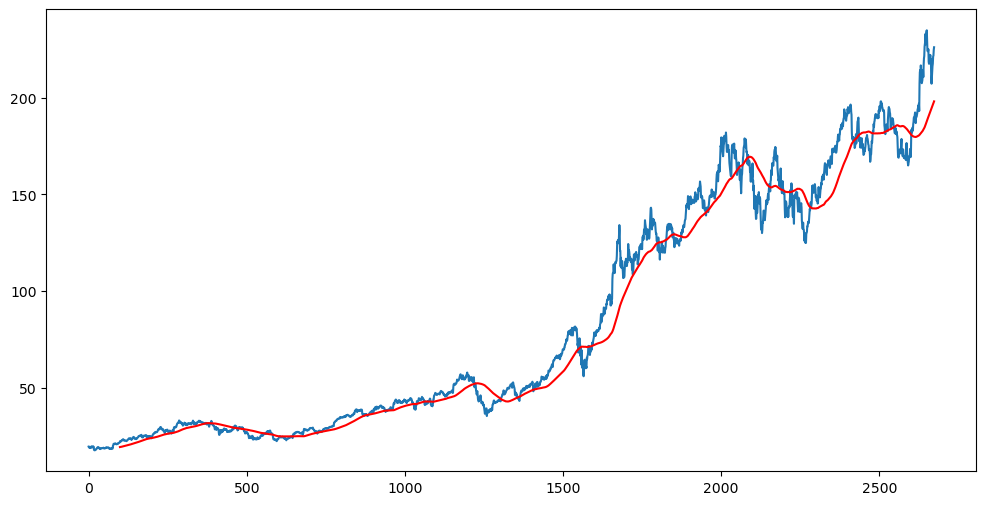

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g ')

In [14]:
df.shape

(2674, 7)

In [15]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1871, 1)
(803, 1)


In [16]:
data_training.head()

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286


In [17]:
data_training.tail()

,Close
1866,125.059998
1867,123.540001
1868,125.889999
1869,125.900002
1870,126.739998


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01520506],
       [0.01174225],
       [0.01258301],
       ...,
       [0.86218255],
       [0.86226236],
       [0.86896567]])

In [20]:
data_training_array.shape

(1871, 1)

In [21]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
#ML Model

In [23]:
from keras.layers import LSTM

In [24]:
from tensorflow.keras import Sequential

In [25]:
from keras.layers import Dense, Dropout , LSTM
#from keras.models import sequential

In [26]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences =True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences =True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences =True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))

/Users/ambadasjoshi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0565
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0060
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0048
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0047
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0042
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0039
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0036
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0038
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0036
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0034
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0031
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0033
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0027
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0027
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - los

model.save('keras_model.h5')

In [29]:
model.save('keras_model.h5')

In [30]:
data_testing.head()

,Close
1871,127.129997
1872,126.110001
1873,127.349998
1874,130.479996
1875,129.639999


In [31]:
data_training.tail(100)

,Close
1771,128.910004
1772,127.139999
1773,127.830002
1774,132.029999
1775,136.869995
...,...
1866,125.059998
1867,123.540001
1868,125.889999
1869,125.900002


In [32]:
past_100_days = data_training.tail(100)

In [33]:
final_df = pd.concat([past_100_days, data_testing],ignore_index=True)

In [34]:
final_df.head()

,Close
0,128.910004
1,127.139999
2,127.830002
3,132.029999
4,136.869995


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.10594295],
       [0.09100117],
       [0.09682594],
       [0.13228092],
       [0.17313856],
       [0.19171033],
       [0.22421067],
       [0.22623672],
       [0.21695083],
       [0.17499573],
       [0.13169007],
       [0.15009284],
       [0.15726831],
       [0.14840453],
       [0.17752826],
       [0.17220997],
       [0.17347629],
       [0.16587872],
       [0.16064492],
       [0.15845014],
       [0.16047605],
       [0.14207328],
       [0.12223531],
       [0.11269631],
       [0.11404688],
       [0.08137767],
       [0.08019584],
       [0.07589057],
       [0.0390849 ],
       [0.04136418],
       [0.09648826],
       [0.07394903],
       [0.04811748],
       [0.03182506],
       [0.04271482],
       [0.        ],
       [0.03992905],
       [0.03055886],
       [0.04727333],
       [0.03942257],
       [0.0644099 ],
       [0.07774775],
       [0.07091002],
       [0.03520174],
       [0.03064323],
       [0.05934491],
       [0.05216951],
       [0.031

In [36]:
input_data.shape

(903, 1)

In [37]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(803, 100, 1)
(803,)


In [39]:
#Making Predictions

y_predicted = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [40]:
y_predicted.shape

(803, 1)

In [41]:
y_test

array([0.09091673, 0.08230626, 0.09277391, 0.11919631, 0.11210534,
       0.11641054, 0.13025487, 0.11902756, 0.1345602 , 0.14874214,
       0.14637849, 0.14393046, 0.14139793, 0.1554955 , 0.16858011,
       0.1738984 , 0.1765153 , 0.19922341, 0.21661322, 0.2381395 ,
       0.22691207, 0.24269794, 0.23754852, 0.24717202, 0.27680222,
       0.27114632, 0.25350327, 0.22024308, 0.25147722, 0.24514597,
       0.25696438, 0.27182167, 0.27545165, 0.25671114, 0.24160049,
       0.24717202, 0.24902919, 0.24615906, 0.2616917 , 0.25823058,
       0.25915917, 0.25139285, 0.25097074, 0.24683441, 0.24902919,
       0.27460744, 0.27638024, 0.29343232, 0.28558163, 0.25325003,
       0.25612016, 0.2686983 , 0.28152967, 0.28076982, 0.27013336,
       0.26321113, 0.27215941, 0.31031565, 0.29942596, 0.30516623,
       0.31478973, 0.32027689, 0.34045247, 0.32711462, 0.31833534,
       0.27528279, 0.28017897, 0.26810732, 0.27578926, 0.27376322,
       0.2507175 , 0.22437954, 0.22851587, 0.24894482, 0.25721

In [42]:
y_predicted

array([[0.10659255],
       [0.1061286 ],
       [0.105858  ],
       [0.10578699],
       [0.1059858 ],
       [0.10648842],
       [0.10729808],
       [0.10843148],
       [0.10984274],
       [0.11147897],
       [0.11331251],
       [0.11532917],
       [0.11750318],
       [0.11973228],
       [0.12199257],
       [0.12428568],
       [0.12662345],
       [0.12900941],
       [0.1314547 ],
       [0.1339184 ],
       [0.13645364],
       [0.13903058],
       [0.14147058],
       [0.14368972],
       [0.14574443],
       [0.14768821],
       [0.14969113],
       [0.1518744 ],
       [0.15433645],
       [0.15728003],
       [0.16092421],
       [0.16534883],
       [0.17053044],
       [0.17635562],
       [0.18251255],
       [0.18871096],
       [0.19463941],
       [0.19999655],
       [0.20459247],
       [0.20850115],
       [0.21178535],
       [0.21453463],
       [0.21683733],
       [0.21871433],
       [0.22016454],
       [0.22120932],
       [0.222072  ],
       [0.223

In [43]:
scaler.scale_

array([0.00844167])

In [44]:
scale_factor = 1/0.00844167
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

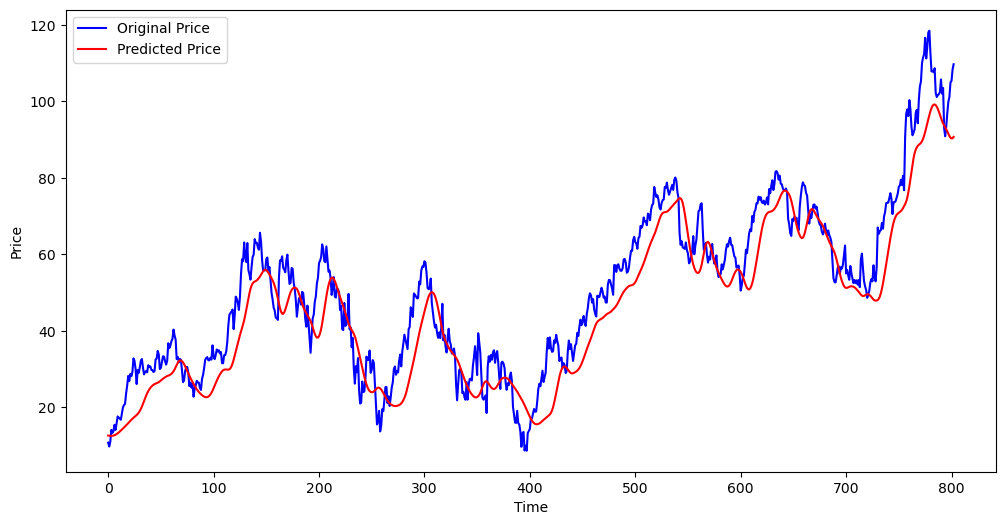

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()